# Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga df

In [21]:
df_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')
df_price= pd.read_csv('data/airbnb_price.csv')
df_room = pd.read_excel('data/airbnb_room_type.xlsx')

In [22]:
df_room.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [23]:
df_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [24]:
df_review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


### Limpieza


In [25]:
df_price['price'] = df_price['price'].str.replace(' dollars', '').astype(int)

In [26]:
df_room['room_type'] = df_room['room_type'].str.lower()

In [27]:
df_review['last_review'] = pd.to_datetime(df_review['last_review'])

### Union DataFrames

In [28]:
df_final = df_review.merge(df_price, on='listing_id').merge(df_room, on='listing_id')

df_final.head()

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt
1,3831,LisaRoxanne,2019-07-05,89,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt
2,5099,Chris,2019-06-22,200,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,Shunichi,2019-06-24,79,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt


# Ejercicio 1

In [29]:
first_reviewed = df_final['last_review'].min()
last_reviewed= df_final['last_review'].max()
print("Fecha más antigua:", first_reviewed)
print("Fecha más reciente:", last_reviewed)

Fecha más antigua: 2019-01-01 00:00:00
Fecha más reciente: 2019-07-09 00:00:00


# Ejercicio 2

In [30]:
private_room = df_final[df_final['room_type'] == 'private room'].shape[0]
print("Número de habitaciones privadas:", private_room)

Número de habitaciones privadas: 11356


# Ejercicio 3


In [31]:
avg_price = round(df_final['price'].mean(), 2)

print("Precio medio de los anuncios:", avg_price)


Precio medio de los anuncios: 141.78


# Ejercicio 4


In [32]:
review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [private_room],
    'avg_price': [avg_price]
})

review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


# Ejercicio adicional

### Investigación

In [33]:
nbhood_full = df_final['nbhood_full'].str.split(', ')

df_final['borough'] = [nbhood_full[i][0] for i in range(len(nbhood_full))]
df_final['neighborhood'] = [nbhood_full[i][1] for i in range(len(nbhood_full))]
print(df_final['borough'])
print(df_final['neighborhood'])

0            Manhattan
1             Brooklyn
2            Manhattan
3            Manhattan
4            Manhattan
             ...      
25204        Manhattan
25205           Queens
25206    Staten Island
25207            Bronx
25208         Brooklyn
Name: borough, Length: 25209, dtype: object
0                Midtown
1           Clinton Hill
2            Murray Hill
3         Hell's Kitchen
4              Chinatown
              ...       
25204    Upper East Side
25205           Flushing
25206        Great Kills
25207         Mott Haven
25208           Bushwick
Name: neighborhood, Length: 25209, dtype: object


### Distribución de precio

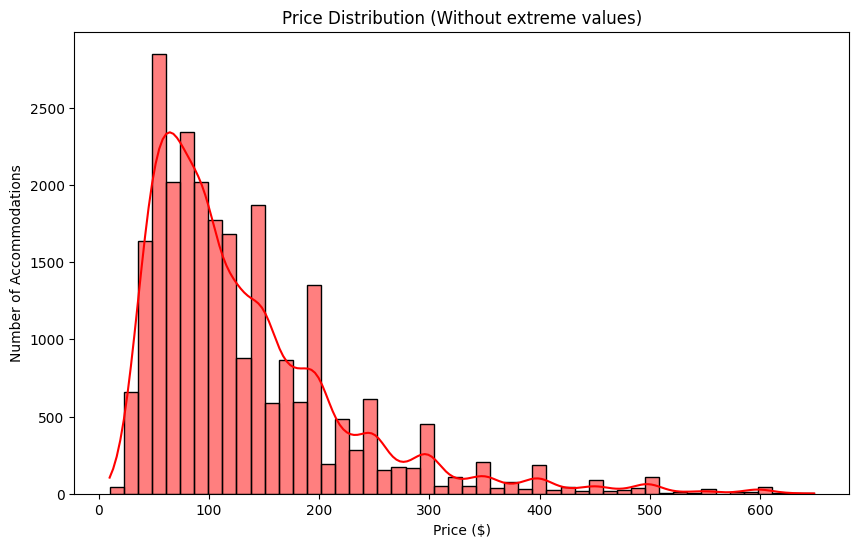

In [34]:
df_final = df_final[(df_final['price']< df_final['price'].quantile(0.99)) & (df_final['price'] > 0)]

plt.figure(figsize=(10, 6))

sns.histplot(df_final, x='price', bins=50, kde=True, color='red')
plt.title('Price Distribution (Without extreme values)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Accommodations')

plt.savefig('src/PriceDistribution.png')

### Precio promedio por distrito

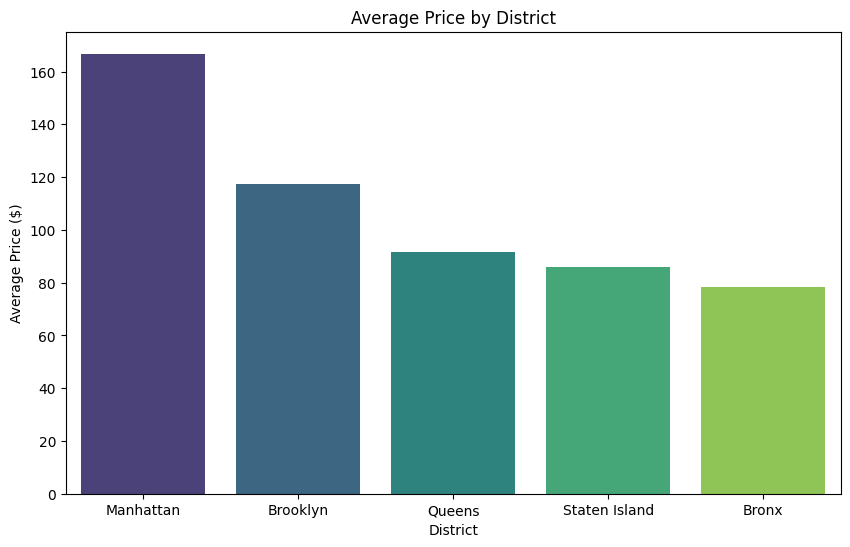

In [35]:
orden_distritos = df_final.groupby('borough')['price'].mean().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_final, 
    x='borough', 
    y='price', 
    order=orden_distritos, 
    hue='borough', 
    palette='viridis',
    errorbar=None
)

plt.title('Average Price by District')
plt.xlabel('District')
plt.ylabel('Average Price ($)')

plt.savefig('src/AveragePrice_X_District.png')

### Cantidad de alojamientos por tipo de habitación

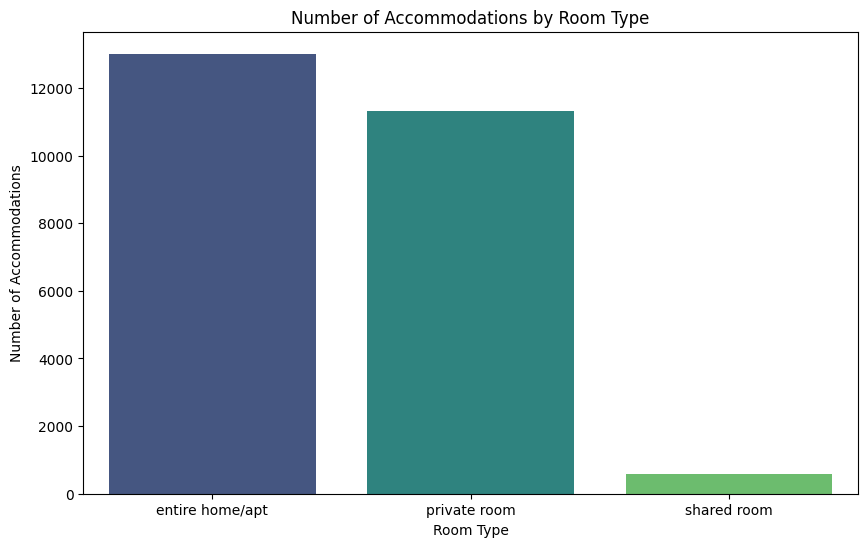

In [36]:
room_type_ord= df_final['room_type'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(
    df_final,
    x='room_type',
    hue='room_type',
    palette='viridis',
    order= room_type_ord
)

plt.title('Number of Accommodations by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Accommodations')

plt.savefig('src/RoomType.png')

In [37]:
df_final.to_csv('data/airbnb_cleaned.csv')
df_final.isnull().sum()

listing_id       0
host_name        8
last_review      0
price            0
nbhood_full      0
description     10
room_type        0
borough          0
neighborhood     0
dtype: int64